# E-Commerce Churn Analysis

In [1]:
import pandas as pd
import numpy as np
!pip install openpyxl
import itertools
import warnings
warnings.filterwarnings("ignore")
from plotly.offline import iplot
import plotly.graph_objs as go #visualization
import plotly.subplots as sp #visualization here...
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt
import seaborn as sns

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.1/242.1 KB 30.2 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [2]:
#The list of metadata
metadata = pd.pandas.read_excel('E Commerce  churn Dataset.xlsx',sheet_name= 0)
metadata

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3
0,NaN,Data,Variable,Discerption
1,NaN,E Comm,CustomerID,Unique customer ID
2,NaN,E Comm,Churn,Churn Flag
3,NaN,E Comm,Tenure,Tenure of customer in organization
4,NaN,E Comm,PreferredLoginDevice,Preferred login device of customer
5,NaN,E Comm,CityTier,City tier
6,NaN,E Comm,WarehouseToHome,Distance in between warehouse to home of customer
7,NaN,E Comm,PreferredPaymentMode,Preferred payment method of customer
8,NaN,E Comm,Gender,Gender of customer
9,NaN,E Comm,HourSpendOnApp,Number of hours spend on mobile application or...


In [3]:
#Actual data
ecom = pd.pandas.read_excel('E Commerce  churn Dataset.xlsx',sheet_name= 1)

In [4]:
ecom

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,55626,0,10.0,Computer,1,30.0,Credit Card,Male,3.0,2,Laptop & Accessory,1,Married,6,0,18.0,1.0,2.0,4.0,150.71
5626,55627,0,13.0,Mobile Phone,1,13.0,Credit Card,Male,3.0,5,Fashion,5,Married,6,0,16.0,1.0,2.0,NaN,224.91
5627,55628,0,1.0,Mobile Phone,1,11.0,Debit Card,Male,3.0,2,Laptop & Accessory,4,Married,3,1,21.0,1.0,2.0,4.0,186.42
5628,55629,0,23.0,Computer,3,9.0,Credit Card,Male,4.0,5,Laptop & Accessory,4,Married,4,0,15.0,2.0,2.0,9.0,178.90


# Exploring the dataset

In [5]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [6]:
print('Shape of our data: ', ecom.shape)
print('Name of features: ',ecom.columns)

Shape of our data:  (5630, 20)
Name of features:  Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


In [7]:
print ("\n Number of Unique values :  \n",ecom.nunique())


 Number of Unique values :  
 CustomerID                     5630
Churn                             2
Tenure                           36
PreferredLoginDevice              3
CityTier                          3
WarehouseToHome                  34
PreferredPaymentMode              7
Gender                            2
HourSpendOnApp                    6
NumberOfDeviceRegistered          6
PreferedOrderCat                  6
SatisfactionScore                 5
MaritalStatus                     3
NumberOfAddress                  15
Complain                          2
OrderAmountHikeFromlastYear      16
CouponUsed                       17
OrderCount                       16
DaySinceLastOrder                22
CashbackAmount                 2586
dtype: int64


In [8]:
print ("\n Number of Null values :  \n",ecom.isnull().sum())


 Number of Null values :  
 CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [9]:
#filling the empty spaces with nan
ecom.replace(' ',np.NaN,inplace=True)
ecom.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


In [10]:
#checking null values again
print ("\n Number of Null values :  \n",ecom.isna().sum()) #Again Checking For Null values


 Number of Null values :  
 CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


In [11]:
 
ecom = ecom.fillna(0) # Filling Na values with 0 as all the null columns are numerical

In [12]:
ecom.isnull().sum() # cheching again for non null  

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

In [13]:
# Checking the distribution of the data and value counts:
for column in ecom.columns.values.tolist():
    print(column)
    print (ecom[column].value_counts())
    print("") 

CustomerID
51201    1
52619    1
50582    1
54676    1
52627    1
        ..
54019    1
51968    1
54015    1
51964    1
51199    1
Name: CustomerID, Length: 5630, dtype: int64

Churn
0    4682
1     948
Name: Churn, dtype: int64

Tenure
0.0     772
1.0     690
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
51.0      1
60.0      1
50.0      1
61.0      1
Name: Tenure, dtype: int64

PreferredLoginDevice
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

CityTier
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

WarehouseToHome
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288


Now as we have taken care of the missing values we will now check the numerical columns and see if we can change some numerical columns in categorical and we can label them better. As we plan to do do project in 2 parts Visualization and Machine Learning Model prediction.

### Changing the columns values

In [14]:
# Convert Tenure to categorical column
def tenure(ecom) :
    if ecom["Tenure"] <= 12 :
        return "Tenure_0-12"
    elif (ecom["Tenure"] > 12) & (ecom["Tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (ecom["Tenure"] > 24) & (ecom["Tenure"] <= 48) :
        return "Tenure_24-48"
    elif (ecom["Tenure"] > 48) & (ecom["Tenure"] <= 60) :
        return "Tenure_48-60"
    elif ecom["Tenure"] > 60 :
        return "Tenure_60+"

ecom["Tenure_grp"] = ecom.apply(lambda ecom:tenure(ecom),
                                      axis = 1)

In [15]:
#Converting Churn column
def churn(ecom) :
    if ecom['Churn'] == 0:
        return 'No'
    else: 
        return 'Yes'
ecom['Churned'] = ecom.apply(lambda ecom : churn(ecom),axis = 1)

In [16]:
#Converting Complained column
def Complained(ecom) :
    if ecom['Complain'] == 0:
        return 'No'
    else: 
        return 'Yes'
ecom['Complained'] = ecom.apply(lambda ecom : Complained(ecom),axis = 1)

In [17]:
#Converting City type
def citytype(ecom) :
    if ecom['CityTier'] == 1:
        return 'City'
    elif ecom['CityTier'] == 2:
        return 'Semi_urban'
    else: 
        return 'Rural'
ecom['city_type'] = ecom.apply(lambda ecom : citytype(ecom),axis = 1)

In [18]:
#Converting Satisfaction 
def Satisfication_score(ecom) :
    if (ecom["SatisfactionScore"] == 1):
        return "Very Low"
    elif (ecom["SatisfactionScore"] == 2):
        return "Low"
    elif (ecom["SatisfactionScore"] == 3):
        return "Average"
    elif (ecom["SatisfactionScore"] == 4):
        return "High"
    elif (ecom["SatisfactionScore"] == 5) :
        return "Very High"

ecom["Satisfaction"] = ecom.apply(lambda ecom:Satisfication_score(ecom),
                                      axis = 1)

The main reason behind converting some numerical column is to narrow down the segmentation and better Visualization categories for Tableau . We will later encode values for prediction model.

In [19]:
#seperating all categorical data: 
c_col = []
for column in ecom:
    if ecom[column].dtype == 'object':
        c_col.append(column)

c_col


['PreferredLoginDevice',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Tenure_grp',
 'Churned',
 'Complained',
 'city_type',
 'Satisfaction']

In [20]:
#seperating all numerical data: 
n_col = []
for column in ecom:
    if ecom[column].dtype != 'object':
        n_col.append(column)

n_col

['CustomerID',
 'Churn',
 'Tenure',
 'CityTier',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

In [21]:
#Removing same columns 
for items in c_col:
    if items in n_col:
        n_col.remove(items)

removal_list = ['Churn','CustomerID','Tenure','CityTier','SatisfactionScore','Complain']

for item in removal_list:
    if item in n_col:
        n_col.remove(item)



id_col = ecom['CustomerID']

In [22]:
num_data = ecom[n_col]
cat_data = ecom[c_col]

In [23]:
num_data

,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,6.0,3.0,3,9,11.0,1.0,1.0,5.0,159.93
1,8.0,3.0,4,7,15.0,0.0,1.0,0.0,120.90
2,30.0,2.0,4,6,14.0,0.0,1.0,3.0,120.28
3,15.0,2.0,4,8,23.0,0.0,1.0,3.0,134.07
4,12.0,0.0,3,3,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...
5625,30.0,3.0,2,6,18.0,1.0,2.0,4.0,150.71
5626,13.0,3.0,5,6,16.0,1.0,2.0,0.0,224.91
5627,11.0,3.0,2,3,21.0,1.0,2.0,4.0,186.42
5628,9.0,4.0,5,4,15.0,2.0,2.0,9.0,178.90


In [24]:
cat_data

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Tenure_grp,Churned,Complained,city_type,Satisfaction
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,Tenure_0-12,Yes,Yes,Rural,Low
1,Phone,UPI,Male,Mobile,Single,Tenure_0-12,Yes,Yes,City,Average
2,Phone,Debit Card,Male,Mobile,Single,Tenure_0-12,Yes,Yes,City,Average
3,Phone,Debit Card,Male,Laptop & Accessory,Single,Tenure_0-12,Yes,No,Rural,Very High
4,Phone,CC,Male,Mobile,Single,Tenure_0-12,Yes,No,City,Very High
...,...,...,...,...,...,...,...,...,...,...
5625,Computer,Credit Card,Male,Laptop & Accessory,Married,Tenure_0-12,No,No,City,Very Low
5626,Mobile Phone,Credit Card,Male,Fashion,Married,Tenure_12-24,No,No,City,Very High
5627,Mobile Phone,Debit Card,Male,Laptop & Accessory,Married,Tenure_0-12,No,Yes,City,High
5628,Computer,Credit Card,Male,Laptop & Accessory,Married,Tenure_12-24,No,No,Rural,High


In [25]:
#Checking shape of categorical data
cat_data.shape

(5630, 10)

In [26]:
#Checking shape of numerical data
num_data.shape

(5630, 9)

In [27]:
ecom_cleaned = pd.concat([id_col, cat_data,num_data],axis= 1 ) #Concat all data
ecom_cleaned.shape

(5630, 20)

In [28]:
ecom_cleaned.head

<bound method NDFrame.head of       CustomerID PreferredLoginDevice PreferredPaymentMode  Gender  \
0          50001         Mobile Phone           Debit Card  Female   
1          50002                Phone                  UPI    Male   
2          50003                Phone           Debit Card    Male   
3          50004                Phone           Debit Card    Male   
4          50005                Phone                   CC    Male   
...          ...                  ...                  ...     ...   
5625       55626             Computer          Credit Card    Male   
5626       55627         Mobile Phone          Credit Card    Male   
5627       55628         Mobile Phone           Debit Card    Male   
5628       55629             Computer          Credit Card    Male   
5629       55630         Mobile Phone          Credit Card    Male   

        PreferedOrderCat MaritalStatus    Tenure_grp Churned Complained  \
0     Laptop & Accessory        Single   Tenure_0-12  

### Predication model: E_commerece data

Now that the data is cleaned we will try to create the prediction model for the data.

## Importing necessary libraries

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from  sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score,recall_score

# Machine Learning - Model Building

Before machine learning models we have to make data ready for model, for that we have to make changes in data it is not possbile for the model for so many text data so we will perform some transformation on categorical columns

In [30]:
#Turning the churn column back to 0 and 1
def churn(ecom_cleaned) :
    if ecom_cleaned['Churned'] == 'Yes':
        return 1
    else: 
        return 0
ecom_cleaned['Churn'] = ecom.apply(lambda ecom_cleaned : churn(ecom_cleaned),axis = 1)

In [31]:
#Removing categorical chun out of the data
ecom_cleaned.drop('Churned',axis = 1,inplace= True)


### Correlation Check before splitting

Before diving in the machine learning we would see the basic correlation between the dependent and independent variable our dependent variable is churn so we will find correlation between the churn and other variables.

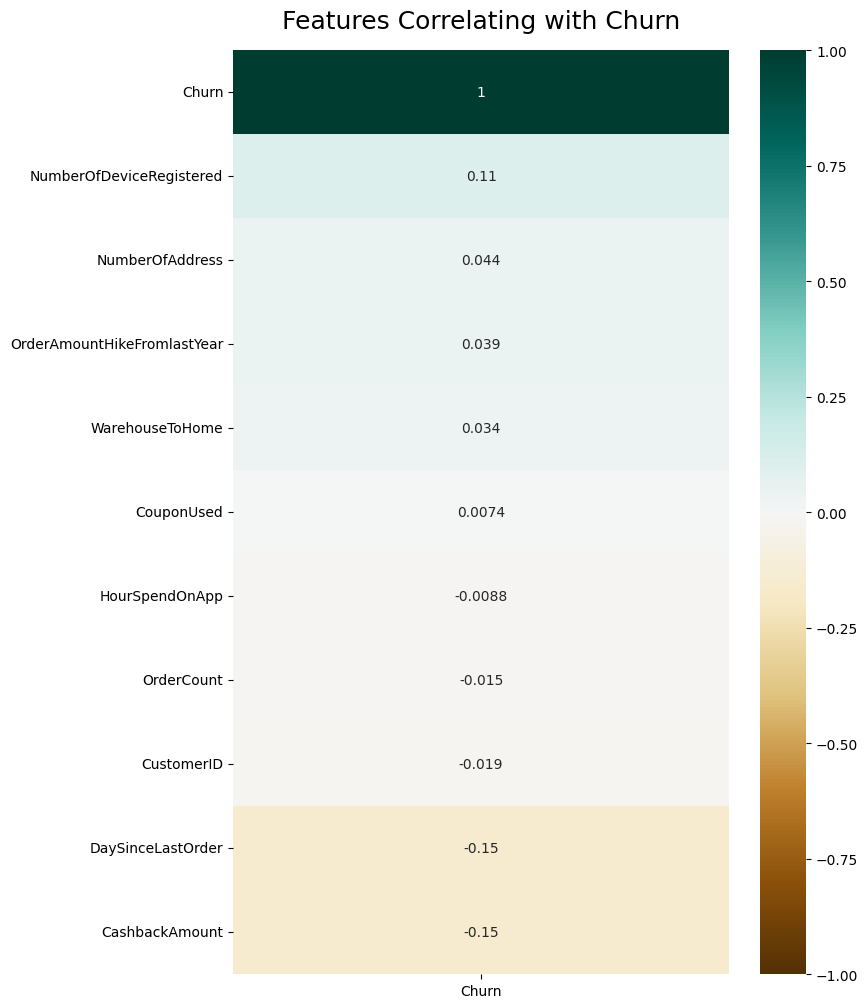

In [32]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(ecom_cleaned.corr()[['Churn']].sort_values(by='Churn', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Churn', fontdict={'fontsize':18}, pad=16);

In [33]:
#Spliting the data

y = ecom_cleaned['Churn']
X = ecom_cleaned.drop('Churn',axis= 1)



In [34]:
#Seperating Binary columns 
binary_cols   = X.nunique()[X.nunique() == 2].keys().tolist()

In [35]:
binary_cols

['Gender', 'Complained']

In [36]:
#Seperating categorical columns for encoding
cate_col = X.nunique()[ecom_cleaned.nunique() < 6].keys().tolist()


In [37]:
#Importing necessary modules
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#Label encoding Binary columns
le = LabelEncoder()
for i in binary_cols :
    X[i] = le.fit_transform(X[i])

#Duplicating columns for multi value columns
X = pd.get_dummies(data = X,columns = cate_col)

In [38]:
#We dont need costumer id so we are going to drop it
X.drop('CustomerID',axis=1,inplace= True)

In [39]:
#We only have 2 columns left without encoding so we are going to encode remaining columns
multi_cols = ['PreferredPaymentMode','PreferedOrderCat']

X = pd.get_dummies(data = X,columns = multi_cols)

In [40]:
X

,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,NumberOfAddress,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,...,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others
0,6.0,3.0,3,9,11.0,1.0,1.0,5.0,159.93,0,...,0,1,0,0,0,0,1,0,0,0
1,8.0,3.0,4,7,15.0,0.0,1.0,0.0,120.90,0,...,0,0,0,1,0,0,0,1,0,0
2,30.0,2.0,4,6,14.0,0.0,1.0,3.0,120.28,0,...,0,1,0,0,0,0,0,1,0,0
3,15.0,2.0,4,8,23.0,0.0,1.0,3.0,134.07,0,...,0,1,0,0,0,0,1,0,0,0
4,12.0,0.0,3,3,11.0,1.0,1.0,3.0,129.60,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,30.0,3.0,2,6,18.0,1.0,2.0,4.0,150.71,1,...,1,0,0,0,0,0,1,0,0,0
5626,13.0,3.0,5,6,16.0,1.0,2.0,0.0,224.91,0,...,1,0,0,0,1,0,0,0,0,0
5627,11.0,3.0,2,3,21.0,1.0,2.0,4.0,186.42,0,...,0,1,0,0,0,0,1,0,0,0
5628,9.0,4.0,5,4,15.0,2.0,2.0,9.0,178.90,1,...,1,0,0,0,0,0,1,0,0,0


In [41]:
#making traing and test data from the data
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=123)

# Decision Trees

In [42]:
ecom_dt = DecisionTreeClassifier(random_state = 0)
ecom_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [43]:
y_pred = ecom_dt.predict(X_test)

In [44]:
#Evaluating the Results
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1127   53]
 [  42  186]]


In [45]:
#Model Performance metrics
print('Decision Tree Accuracy Score:', accuracy_score(y_test, y_pred))
print('Decision Tree precision Score:', precision_score(y_test, y_pred))
print('Decision Tree Recall Score:', recall_score(y_test, y_pred))
print('Decision Tree F1 Score:', f1_score(y_test, y_pred))


Decision Tree Accuracy Score: 0.9325284090909091
Decision Tree precision Score: 0.7782426778242678
Decision Tree Recall Score: 0.8157894736842105
Decision Tree F1 Score: 0.7965738758029978


Test Data Accuracy: 0.9325


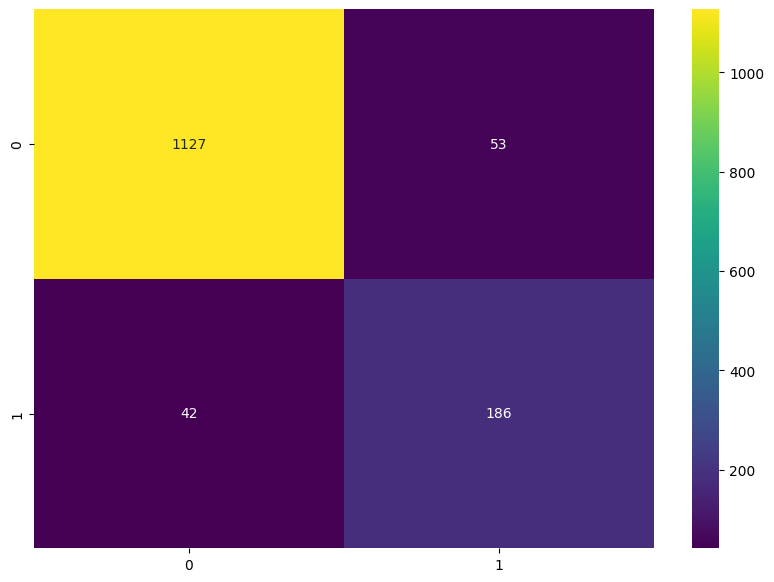

In [46]:
#For better visualization confusion metrics
dt_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(dt_cm, annot = True, fmt ='g',cmap = "viridis")
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred))

# Logistic Regression

In [47]:
ecom_lr = LogisticRegression(random_state = 0)
ecom_lr.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [48]:
y_pred_lr = ecom_lr.predict(X_test)

In [49]:
#Evaluating the Results
cm_lr = confusion_matrix(y_test, y_pred_lr)
print(cm_lr)

[[1143   37]
 [ 147   81]]


In [50]:
print('Linear Regression Accuracy Score:', accuracy_score(y_test, y_pred_lr))
print('Linear Regression precision Score:', precision_score(y_test, y_pred_lr))
print('Linear Regression Recall Score:', recall_score(y_test, y_pred_lr))
print('Linear Regression F1 Score:', f1_score(y_test, y_pred_lr))


Linear Regression Accuracy Score: 0.8693181818181818
Linear Regression precision Score: 0.6864406779661016
Linear Regression Recall Score: 0.35526315789473684
Linear Regression F1 Score: 0.4682080924855492


Test Data Accuracy: 0.8693


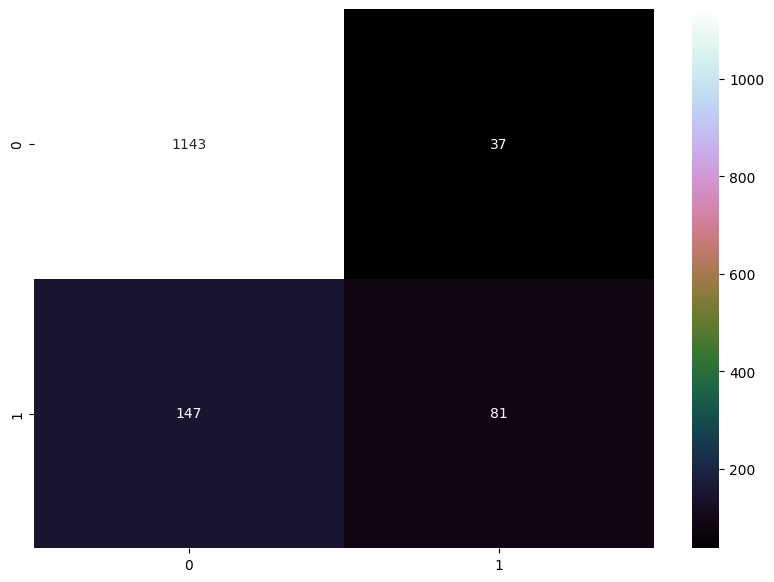

In [51]:
lr_cm = pd.DataFrame(cm_lr, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(lr_cm, annot = True, fmt ='g',cmap = "cubehelix")
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred_lr))

# Extra Trees Classifier

In [52]:
ecom_etc = ExtraTreesClassifier(random_state = 0)
ecom_etc.fit(X_train, y_train)

ExtraTreesClassifier(random_state=0)

In [53]:
y_pred_etc = ecom_etc.predict(X_test)

In [54]:
#Evaluating the Results
cm_etc = confusion_matrix(y_test, y_pred_etc)
print(cm_etc)

[[1174    6]
 [  53  175]]


In [55]:
print('Extra Tree Accuracy Score:', accuracy_score(y_test, y_pred_etc))
print('Extra Tree precision Score:', precision_score(y_test,y_pred_etc))
print('Extra Tree Recall Score:', recall_score(y_test, y_pred_etc))
print('Extra Tree F1 Score:', f1_score(y_test, y_pred_etc))


Extra Tree Accuracy Score: 0.9580965909090909
Extra Tree precision Score: 0.9668508287292817
Extra Tree Recall Score: 0.7675438596491229
Extra Tree F1 Score: 0.8557457212713937


Test Data Accuracy: 0.9581


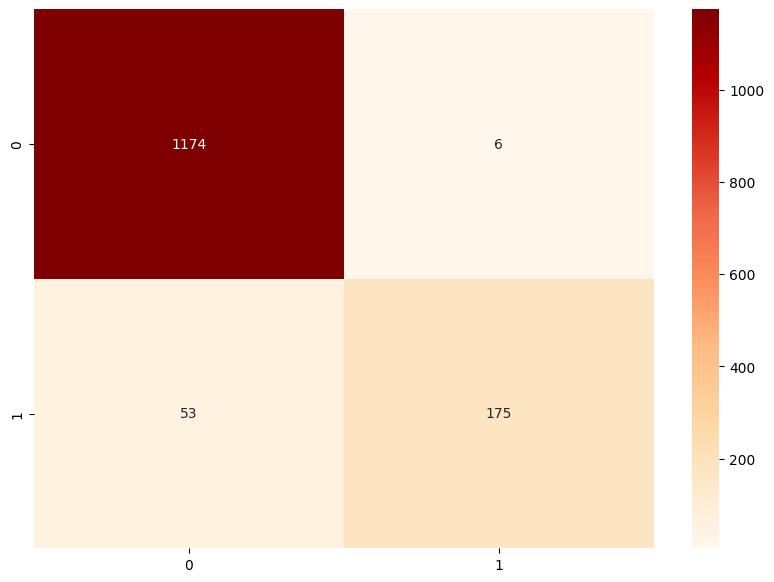

In [56]:
etc_cm = pd.DataFrame(cm_etc, index = (0, 1), columns = (0, 1))
plt.figure(figsize = (10, 7))
sns.heatmap(etc_cm, annot = True, fmt ='g',cmap = "OrRd")
print("Test Data Accuracy: %.4f" %accuracy_score(y_test, y_pred_etc))

In [57]:
corrplot(ecom_etc, method="number")

NameError: name 'corrplot' is not defined

# K- fold Cross Validation

In [56]:
from sklearn.model_selection import cross_val_score
cross_val_acc = cross_val_score(estimator = ecom_etc, X= X_train, y =y_train, cv =10)

In [57]:
cross_val_acc

array([0.95508274, 0.93144208, 0.9549763 , 0.94549763, 0.95023697,
       0.92180095, 0.94075829, 0.96445498, 0.93127962, 0.94549763])

So we made and compared 3 machine learning models Linear Regression ,Decision Tree and Extra Tree Classifier and we can see that Extra Tree Classifier has the highest accuracy (this score is going to be our base metric) and if we come scores overall we can see that Extra tree classifier is the best one out of all 3 models we can take it as a our final working model.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9b8c0f5a-10fe-4e85-83be-22bfe7d9b3ef' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>